In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%%time
df = pd.read_csv("data/train.csv")

Wall time: 7.61 s


Datatypes in the dataset

In [7]:
df.dtypes.value_counts()

float64    200
int64        1
object       1
dtype: int64

In [8]:
df.shape

(200000, 202)

In [9]:
df.describe(percentiles=[])

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Divide features, target and id_code

In [30]:
%%time
features = df.drop(['ID_code', 'target'], axis=1) #np.array(df)[:,2:]
target = df["target"] #np.array(df["target"]).reshape(-1, 1)
id_code = df["ID_code"] #np.array(df["ID_code"]).reshape(-1, 1)

print("features", features.shape)
print("target", target.shape)
print("id_code", id_code.shape)

features (200000, 200)
target (200000,)
id_code (200000,)
Wall time: 206 ms


Check for missing values

In [31]:
df.isnull().sum().sum()/df.shape[0]

0.0

Distribution of target classes

In [32]:
df["target"].value_counts()/df.shape[0]*100

0    89.951
1    10.049
Name: target, dtype: float64

**The data is imbalanced.** This means that metric _accuracy_ means very little here since we have a _classification problem_.

Calculate unique values for features

In [33]:
%%time
column_names = df.columns

temp = np.empty((0,3), str)

for column in column_names:
    cnt = len(df[column].unique())
    pct = round(len(df[column].unique())/df.shape[0], 3)
    app = [[column, cnt, pct]]
    temp = np.concatenate((temp, app), axis=0)
    
column_df = pd.DataFrame(temp, columns=["name", "amount", "percentage"])

print(column_df.sort_values(["percentage"], ascending=True).head(5))
print(column_df.sort_values(["percentage"], ascending=True).tail(5))

        name amount percentage
1     target      2        0.0
70    var_68    451      0.002
93    var_91   7962       0.04
110  var_108   8525      0.043
105  var_103   9376      0.047
        name  amount percentage
63    var_61  159369      0.797
76    var_74  161058      0.805
119  var_117  164469      0.822
47    var_45  169968       0.85
0    ID_code  200000        1.0
Wall time: 3.28 s


<hr style="background-color: black;height: 5.0px;"/>
# Prepare train, test and validation sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
feature_high_density = ['var_139', 'var_76', 'var_149', 'var_21', 'var_184', 'var_174',
       'var_80', 'var_45', 'var_40', 'var_90', 'var_26', 'var_48',
       'var_118', 'var_18', 'var_172', 'var_67', 'var_70', 'var_107',
       'var_86', 'var_147', 'var_44', 'var_74', 'var_165', 'var_199',
       'var_13', 'var_190', 'var_173', 'var_110', 'var_123', 'var_137',
       'var_5', 'var_49', 'var_167', 'var_75', 'var_154', 'var_164',
       'var_122', 'var_109', 'var_155', 'var_135', 'var_170', 'var_51',
       'var_1', 'var_87', 'var_141', 'var_33', 'var_82', 'var_97',
       'var_92', 'var_35', 'var_81', 'var_157', 'var_22', 'var_187',
       'var_178', 'var_83', 'var_163', 'var_180', 'var_146', 'var_102',
       'var_198', 'var_0', 'var_2', 'var_52', 'var_191', 'var_179',
       'var_89', 'var_11', 'var_54', 'var_188', 'var_115', 'var_120',
       'var_196', 'var_119', 'var_94', 'var_56', 'var_127', 'var_36',
       'var_145', 'var_20', 'var_142', 'var_151', 'var_24', 'var_99',
       'var_134', 'var_58', 'var_177', 'var_55', 'var_186', 'var_78',
       'var_85', 'var_47', 'var_19', 'var_128', 'var_61', 'var_138',
       'var_171', 'var_84', 'var_32', 'var_140', 'var_193', 'var_194',
       'var_77', 'var_121', 'var_8', 'var_150', 'var_175', 'var_192',
       'var_182', 'var_113', 'var_159', 'var_106', 'var_176', 'var_160',
       'var_6', 'var_31', 'var_104', 'var_72', 'var_9', 'var_88',
       'var_73', 'var_63', 'var_53', 'var_162', 'var_101', 'var_168',
       'var_65', 'var_195', 'var_116', 'var_132', 'var_112', 'var_117',
       'var_136', 'var_197', 'var_69', 'var_143', 'var_158', 'var_62',
       'var_111', 'var_152', 'var_34', 'var_114', 'var_96', 'var_130',
       'var_129', 'var_183', 'var_95', 'var_60', 'var_66', 'var_16',
       'var_166', 'var_156', 'var_3', 'var_100', 'var_64', 'var_144',
       'var_105', 'var_39', 'var_169', 'var_46', 'var_93', 'var_28',
       'var_4', 'var_181', 'var_37', 'var_133', 'var_12', 'var_131',
       'var_23', 'var_7', 'var_124', 'var_10', 'var_57', 'var_153',
       'var_14', 'var_29', 'var_189', 'var_79', 'var_43', 'var_59',
       'var_71', 'var_108', 'var_148', 'var_125', 'var_50', 'var_91',
       'var_41', 'var_42', 'var_17', 'var_30', 'var_15', 'var_126',
       'var_25', 'var_161', 'var_38', 'var_98', 'var_27', 'var_185',
       'var_103', 'var_68']

feature_high_density = feature_high_density[:100]

In [36]:
%%time
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=15, stratify=target)
#x_train, x_test, y_train, y_test = train_test_split(features[feature_high_density], target, test_size=0.2, random_state=15, stratify=target)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=15, stratify=y_train)

x_train = np.float64(x_train)
x_val = np.float64(x_val)
x_test = np.float64(x_test)

y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (144000, 200)
Shape of x_test: (40000, 200)
Shape of x_val: (16000, 200)
Shape of y_train: (144000, 1)
Shape of y_test: (40000, 1)
Shape of y_val: (16000, 1)
Wall time: 763 ms


Scale the data

In [37]:
%%time
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

Wall time: 366 ms


In [38]:
%%time
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Wall time: 511 ms


<hr style="background-color: black;height: 5.0px;"/>
# Build the NN

In [39]:
def prob_to_class(x, threshold=0.5):
    return np.where(x > threshold, 1, 0)

In [124]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.constraints import unit_norm, max_norm
from tensorflow.keras import regularizers, initializers

from sklearn.metrics import roc_auc_score

In [41]:
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

### Accepted model

In [135]:
%%time
print("Size of input dimension:", x_train_scaled.shape[1])
model = Sequential()
model.add(Dense(units=256, input_dim=x_train_scaled.shape[1],
                #kernel_constraint=unit_norm(),
                #kernel_regularizer=regularizers.l2(0.001),
                activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.8)) # 0.2 < dropout < 0.5
#model.add(Dense(units=128, input_dim=x_train_scaled.shape[1],
                #kernel_constraint=unit_norm(),
                #kernel_regularizer=regularizers.l2(0.001),
#                activation="tanh"))
#model.add(BatchNormalization())
#model.add(Dropout(rate=0.5)) # 0.2 < dropout < 0.5
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[auroc])

history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val),
                    epochs=100,
                    batch_size=int(x_train_scaled.shape[0]/10),
                    #batch_size=2048,
                    verbose=2)

Size of input dimension: 200
Train on 144000 samples, validate on 16000 samples
Epoch 1/100
 - 4s - loss: 0.4305 - val_loss: 0.3827
Epoch 2/100
 - 3s - loss: 0.3425 - val_loss: 0.3378
Epoch 3/100
 - 3s - loss: 0.3301 - val_loss: 0.3243
Epoch 4/100
 - 4s - loss: 0.3240 - val_loss: 0.3225
Epoch 5/100
 - 3s - loss: 0.3222 - val_loss: 0.3215
Epoch 6/100
 - 3s - loss: 0.3211 - val_loss: 0.3202
Epoch 7/100
 - 3s - loss: 0.3197 - val_loss: 0.3188
Epoch 8/100
 - 3s - loss: 0.3184 - val_loss: 0.3174
Epoch 9/100
 - 3s - loss: 0.3169 - val_loss: 0.3159
Epoch 10/100
 - 3s - loss: 0.3154 - val_loss: 0.3144
Epoch 11/100
 - 3s - loss: 0.3137 - val_loss: 0.3125
Epoch 12/100
 - 3s - loss: 0.3119 - val_loss: 0.3106
Epoch 13/100
 - 3s - loss: 0.3099 - val_loss: 0.3086
Epoch 14/100
 - 3s - loss: 0.3078 - val_loss: 0.3062
Epoch 15/100
 - 3s - loss: 0.3054 - val_loss: 0.3036
Epoch 16/100
 - 3s - loss: 0.3027 - val_loss: 0.3009
Epoch 17/100
 - 3s - loss: 0.3000 - val_loss: 0.2980
Epoch 18/100
 - 3s - loss: 0

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                16080     
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_8 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 41        
Total params: 19,361
Trainable params: 19,361
Non-trainable params: 0
_________________________________________________________________


Evaluate

In [136]:
result = model.evaluate(x_test_scaled, y_test)
print("Metric", model.metrics_names[0],":",str(round(result, 4)))

40000/40000 [==============================] - 1s 24us/step
Metric loss : 0.2336


In [137]:
probability_x_test =  model.predict(x_test_scaled)
res_df = pd.DataFrame(np.concatenate((probability_x_test, prob_to_class(probability_x_test, 0.5), y_test), axis=1), columns=["probability", "predicted", "target"])
print(res_df.dtypes)
print(res_df["predicted"].value_counts()/res_df.shape[0]*100)
print(res_df["target"].value_counts()/res_df.shape[0]*100)
res_df.head(5)

probability    float64
predicted      float64
target         float64
dtype: object
0.0    96.14
1.0     3.86
Name: predicted, dtype: float64
0.0    89.95
1.0    10.05
Name: target, dtype: float64


,probability,predicted,target
0,0.100877,0.0,0.0
1,0.014841,0.0,0.0
2,0.016622,0.0,0.0
3,0.000785,0.0,0.0
4,0.019304,0.0,0.0


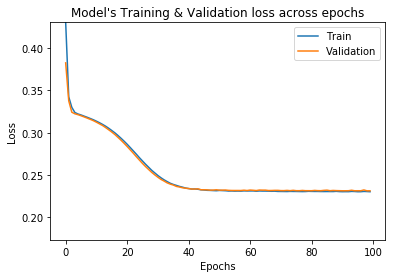

In [138]:
max_loss = np.max(history.history["loss"])
min_loss = np.min(history.history["val_loss"]) - 0.25 * np.min(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.ylim(min_loss, max_loss)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<hr style="background-color: black;height: 5.0px;"/>
## ROC

In [23]:
from sklearn.metrics import roc_auc_score

In [139]:
%%time
roc_score = roc_auc_score(y_test, probability_x_test)

print(roc_score)

0.8595957123775231
Wall time: 11 ms


In [ ]:
#roc - 0.857143

<hr style="background-color: black;height: 5.0px;"/>
## Submission of results

In [82]:
test = pd.read_csv("data/test.csv")

In [83]:
test.shape

(200000, 201)

In [84]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [89]:
%%time

test_features = test.drop(['ID_code'], axis=1) #np.array(test)[:,1:]
result_df = pd.DataFrame(test["ID_code"])

print("test_features shape", test_features.shape)
print("result_df shape", result_df.shape)

test_features shape (200000, 200)
result_df shape (200000, 1)
Wall time: 215 ms


Scale the data

In [90]:
%%time
test_scaled = scaler.transform(test_features)

Wall time: 508 ms


In [91]:
pd.DataFrame(test_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.535360,0.897837,0.628717,0.715833,0.548256,0.607399,0.574061,0.578182,0.601954,0.666409,...,0.365097,0.749230,0.195180,0.456168,0.266369,0.810571,0.566680,0.788006,0.464797,0.447387
1,0.408005,0.641132,0.533050,0.395056,0.355501,0.574572,0.601977,0.594479,0.276928,0.259747,...,0.758807,0.593904,0.389199,0.719905,0.365408,0.601884,0.385026,0.647505,0.650104,0.265418
2,0.254905,0.184314,0.465517,0.535820,0.447373,0.852630,0.417628,0.667081,0.571650,0.599619,...,0.408475,0.705125,0.474327,0.446866,0.227615,0.775034,0.210427,0.182324,0.688933,0.232704
3,0.408357,0.539775,0.574667,0.500064,0.325182,0.719189,0.424956,0.681060,0.663605,0.472520,...,0.726554,0.606357,0.447945,0.495003,0.344749,0.883857,0.553991,0.541227,0.340380,0.514331
4,0.567520,0.586569,0.696941,0.588941,0.347404,0.482541,0.739656,0.235211,0.644417,0.427482,...,0.561812,0.611288,0.417291,0.488013,0.576606,0.521822,0.270891,0.219809,0.386450,0.440485


Convert probability to class

In [107]:
%%time
result_df['probability'] = np.round(model.predict(test_scaled), 1)
result_df['classification'] = prob_to_class(x=result_df['probability'], threshold=0.5)

print(result_df.head(5))

  ID_code  target  classification  probability
0  test_0     0.2               0          0.1
1  test_1     0.3               0          0.2
2  test_2     0.0               0          0.0
3  test_3     0.2               0          0.3
4  test_4     0.1               0          0.0
Wall time: 2.74 s


In [108]:
result_df['classification'].value_counts()/result_df.shape[0]*100

0    96.9995
1     3.0005
Name: classification, dtype: float64

In [95]:
import time

t = time.localtime()
timestamp = time.strftime('%Y%m%d_%H%M', t)
save_filename = ("score/nn_result-" + timestamp + ".csv")

result_df = result_df.rename(columns={'probability': 'target'}) # rename to match submission criteria
result_df[['ID_code', 'target']].to_csv(save_filename, index=False)